# Short report - What is Data Science?
Data science is the field of study that combines domain knowledge, programming skills and knowledge of mathematics and statistics to extract meaningful insights from data.

## Examples

In [19]:
# All kinds of insights can be made on data. You can search the D-type, all existing categories and more.

In [20]:
import pandas as pd
df = pd.read_csv('movies.csv', sep=';', thousands=',')
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,1972,R,175 min,Comedy,9.2,1860471,$134.97M
1,2.0,The Silence of the Lambs,1991,R,118 min,Crime,8.6,1435344,$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,Fantasy,8.7,1294805,$290.48M
3,4.0,The Shawshank Redemption,1994,R,142 min,Drama,9.3,2683302,$28.34M
4,5.0,The Shining,1980,R,146 min,Horror,8.4,1025560,$44.02M


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            100 non-null    float64
 1   movie_name       100 non-null    object 
 2   year_of_release  100 non-null    int64  
 3   category         100 non-null    object 
 4   run_time         100 non-null    object 
 5   genre            100 non-null    object 
 6   imdb_rating      100 non-null    float64
 7   votes            100 non-null    int64  
 8   gross_total      99 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB


In [22]:
df['category'].unique()

array(['R', 'PG', 'PG-13', 'G'], dtype=object)

In [23]:
df.describe() # Here are all kinds of calculations made, like the count of each column, mean (average), 
# std (measure of how spread out the numbers are), some percentages, min and max value.

,index,year_of_release,imdb_rating,votes
count,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,1988.990000,8.357000,9.146570e+05
std,29.011492,20.023973,0.376656,5.964204e+05
min,1.000000,1931.000000,7.200000,1.074800e+04
25%,25.750000,1979.000000,8.100000,4.854240e+05
50%,50.500000,1995.000000,8.300000,8.137855e+05
75%,75.250000,2003.000000,8.600000,1.216750e+06
max,100.000000,2015.000000,9.300000,2.683302e+06


In [24]:
# You can also create visuals. For example a histogram or a boxplot

<AxesSubplot:>

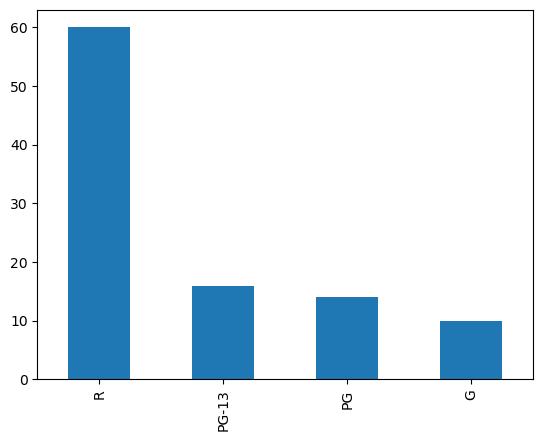

In [25]:
df['category'].value_counts().plot(kind='bar')

<AxesSubplot:>

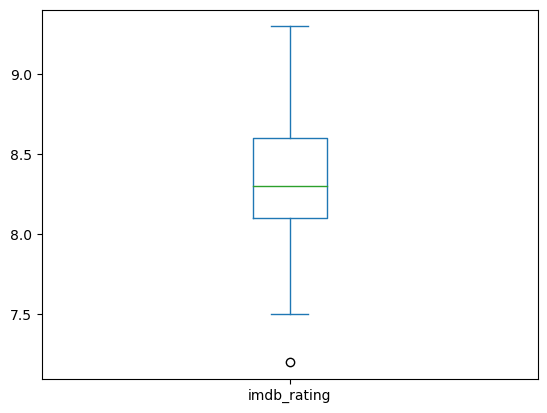

In [26]:
df['imdb_rating'].plot(kind='box')

In [32]:
# There is also scatterplot, barplot, trees and more

<AxesSubplot:xlabel='imdb_rating', ylabel='votes'>

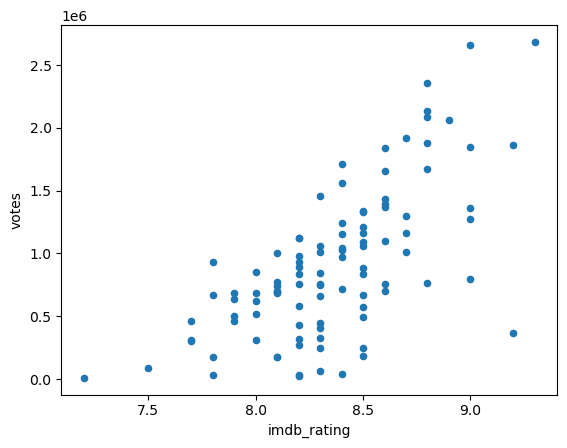

In [28]:
df.plot(kind='scatter', x='imdb_rating', y='votes')

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='category', ylabel='votes'>

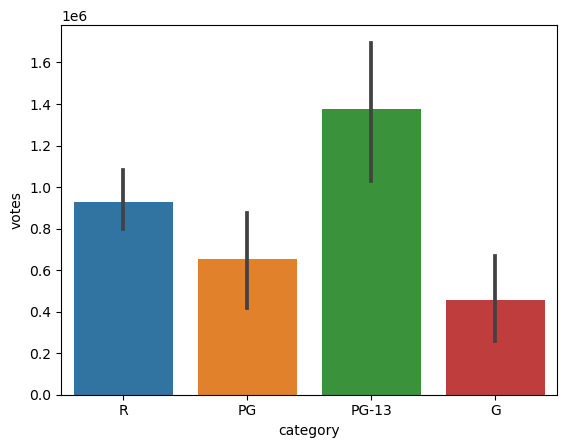

In [31]:
sns.barplot(y="votes", x="category", data=df)

In [49]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

def plot_tree(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features, 
                          class_names=class_names, 
                          filled=True, rounded=True, 
                          special_characters=True) 

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [50]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['genre'])

In [53]:
features= ['imdb_rating', 'votes']
dt_classification = DecisionTreeClassifier(max_depth = 3)
dt_classification.fit(df_train[features], df_train['genre'])

DecisionTreeClassifier(max_depth=3)

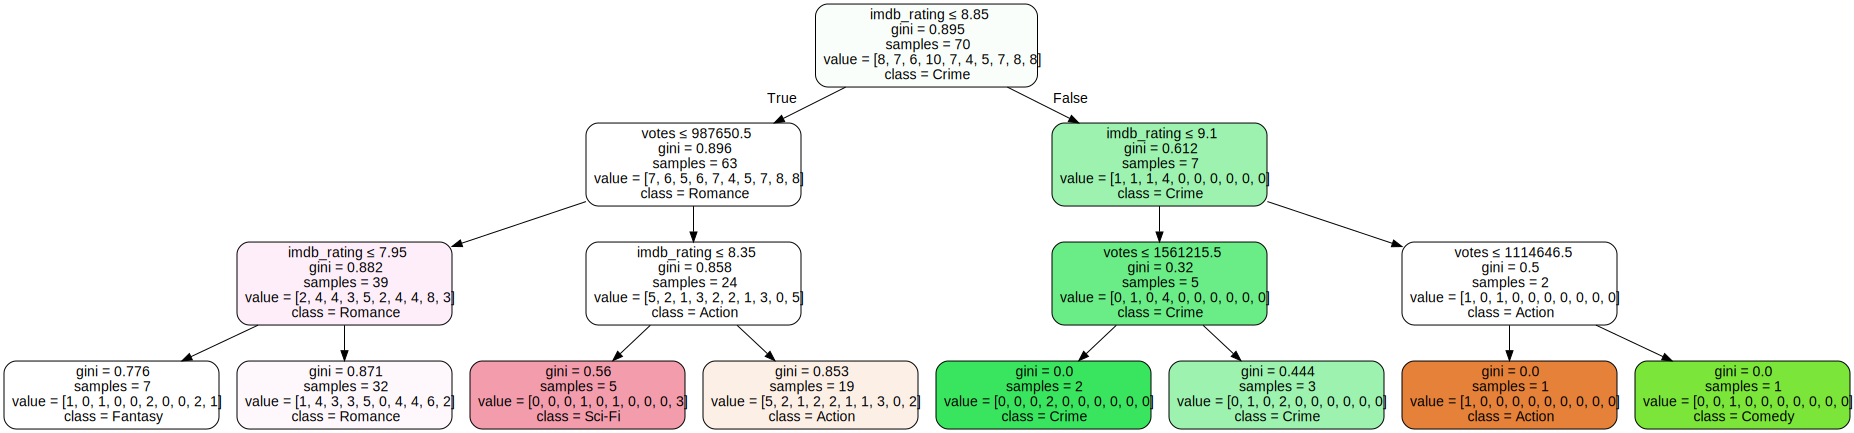

In [54]:
plot_tree(dt_classification, features, np.sort(df.genre.unique()))

In [64]:
# Predictions could also be made about, for example, accuracy

In [65]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [66]:
features= ['imdb_rating', 'votes']
dt_classification = DecisionTreeClassifier(max_depth = 13) # Increase max_depth to see effect in the plot
dt_classification.fit(df_train[features], df_train['genre'])

DecisionTreeClassifier(max_depth=13)

In [67]:
predictionsOnTrainset = dt_classification.predict(df_train[features])
predictionsOnTestset = dt_classification.predict(df_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, df_train.genre)
accuracyTest = calculate_accuracy(predictionsOnTestset, df_test.genre)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9428571428571428
Accuracy on test set 0.2


## Relation Data Science and Business Intelligence
Both Data Science and Business Intelligence analyze data to generate insights that can support decision making.

## Relation Data Science and AI
Both Data Science and AI extract insights from data and automate decision making proccesses.